In [1]:
import pandas as pd
import seaborn as sns

import random

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clrs
import matplotlib.cbook as cbook

from DBScan import DBScan

# Leitura do Dataset

In [2]:
conjunto = pd.read_csv('dataset_processado.csv')
conjunto = conjunto.drop_duplicates(subset=['cases' , 'deaths']) #Remoção de dados duplicados
conjunto.sample(n=500)

,county,cases,deaths
28278,Fairfax,328,5
12651,Clayton,37,1
4538,Miami-Dade,101,0
10060,Suffolk,234,2
18836,Bergen,2169,35
...,...,...,...
39627,Monmouth,2770,71
7046,Clark,9,3
38754,Kankakee,128,6
42944,Tarrant,588,19


In [3]:
N = len(conjunto)
x = conjunto.cases.values
y = conjunto.deaths.values

print(N)
print(x.shape)
print(y.shape)

3563
(3563,)
(3563,)


In [4]:
coordenadas = [ [ x[i] , y[i] ] for i in range(len(x)) ]
conjunto['points'] = coordenadas

In [5]:
len(conjunto['points'])

3563

# Teste com DBSCAN

In [6]:
db_scan = DBScan(coordenadas)
labels = db_scan.make_clusters( min_points=2, eps=5)

In [7]:
coords = coordenadas

# Plot das informações

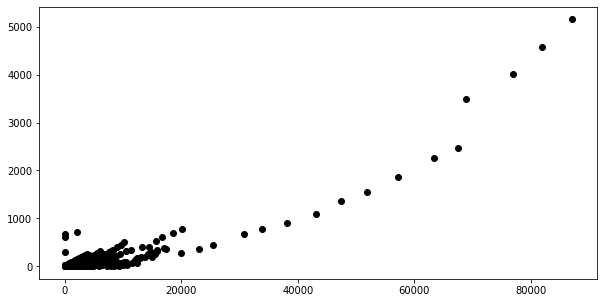

In [8]:
fig, ax = plt.subplots(figsize=( 10, 5 ))

for coordenada in conjunto['points']:
    x_c, y_c = coordenada
    plt.plot(x_c, y_c, 'o', color='black')

plt.show()

# Plot dos Clusters do DBSCAN

In [9]:
less1 = []
zero1 = []
one1  = []
for i in range( len(coords) ):
    x_c, y_c = coords[i]
    if (labels[i] == -1):
        less1.append([x_c, y_c])
    elif (labels[i] == 0):
        zero1.append([x_c, y_c])
    else:
        one1.append([x_c, y_c])
        

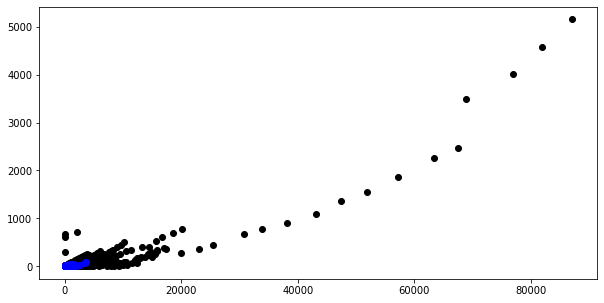

In [10]:
fig, ax = plt.subplots(figsize=( 10, 5 ))
[ plt.plot(c[0], c[1], 'o', color='black') for c in zero1 ]
[ plt.plot(c[0], c[1], 'o', color='blue') for c in one1 ]
[ plt.plot(c[0], c[1], 'o', color='red') for c in less1 ]

plt.show()

# Comparação com DBSCAN do sklearn

In [11]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=5, min_samples=2).fit( list(conjunto['points']) )
c_labels = clustering.labels_

In [12]:
less2 = []
zero2 = []
one2  = []
for i in range( len(coords) ):
    x_c, y_c = coords[i]
    if (c_labels[i] == -1):
        less2.append([x_c, y_c])
    elif (c_labels[i] == 0):
        zero2.append([x_c, y_c])
    else:
        one2.append([x_c, y_c])
        

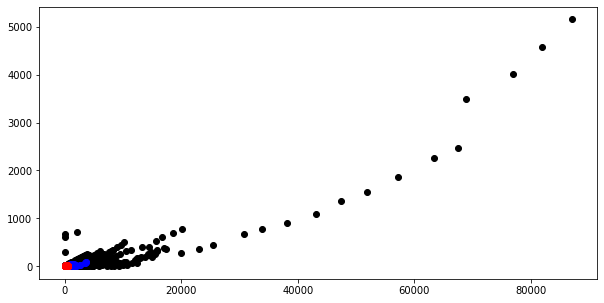

In [13]:
fig, ax = plt.subplots(figsize=( 10, 5 ))
[ plt.plot(c[0], c[1], 'o', color='black') for c in less2 ]
[ plt.plot(c[0], c[1], 'o', color='blue') for c in one2 ]
[ plt.plot(c[0], c[1], 'o', color='red') for c in zero2 ]

plt.show()